**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Neha Nair
- Pranav Soma
- Satya Rajendra
- Thor
- Wasp

# Research Question

What specific factors have most contributed to novels in the 'Paperback Nonfiction' category dominating the 'New York Times Bestseller' list in the time frame from 2020 to 2023?

By dominating the 'New York Times Bestseller' list, we are referring to novels maintaining top rankings on the list for the longest number of weeks. The factors we will be exploring are the inclusion of current events in the novel, author credibility/experience (determined by whether the author has had previous 'New York Times Bestseller' books), average ratings (Goodreads), number of awards received, appearance on a celebrity book club list, and publication timing (season). Using our research, authors aiming for recognition on the 'New York Times Bestseller' list in this genre may consider certain inclusions, such as references to current events, in their work, while publishers can identify effective marketing strategies to reach a wider audience.

## Background and Prior Work


- Include a general introduction to your topic
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

 **Use inline citation through HTML footnotes to specify which references support which statements** 

For example: After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Use a minimum of 2 or 3 citations, but we prefer more.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) You need enough to fully explain and back up important facts. 

Note that if you click a footnote number in the paragraph above it will transport you to the proper entry in the footnotes list below.  And if you click the ^ in the footnote entry, it will return you to the place in the main text where the footnote is made.

To understand the HTML here, `<a name="#..."> </a>` is a tag that allows you produce a named reference for a given location.  Markdown has the construciton `[text with hyperlink](#named reference)` that will produce a clickable link that transports you the named reference.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.


# Hypothesis


Our null hypothesis is that none of the factors (inclusion of current events, author credibility, average ratings, number of awards received, appearance on a celebrity book club list, or publication timing/season) significantly influence a novel's likelihood of dominating the 'New York Times Bestseller' list for the 'Paperback Nonfiction' category in the time frame from 2020 to 2023.
Our alternative hypothesis is that at least one of the factors significantly influences a novel's likelihood of dominating the 'New York Times Bestseller' list for the 'Paperback Nonfiction' category in the time frame from 2020 to 2023. We will be using a significance level (alpha) of 0.05, as this has been conventionally accepted as the threshold to discriminate significant from non-significant results in statistical testing.

In particular, we think that the inclusion of current events most significantly impacts a paperback nonfiction book's likelihood of maintaining a top position on the 'New York Times Bestseller' list.
We believe that people are more likely to read nonfiction novels that relate to or are concerning current events, especially during pivotal moments in history, such as during election seasons.
Since our data set includes a presidential election year, 2020, we think this factor would strongly impact the likelihood of a nonfiction novel gaining popularity and becoming a 'New York Times Bestseller' from 2020 to 2023.
Essentially, we are assuming that people who aren't regular nonfiction readers would typically only become interested in this genre when seeking to increase their awareness of current events.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- Dataset #2 (if you have more than one!)
  - Dataset Name:
  - Link to the dataset:
  - Number of observations:
  - Number of variables:
- etc

Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for. Include information about how you would need to wrangle/clean/preprocess the dataset

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

## Dataset #1 (use name instead of number here)

In [ ]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 
import requests
from datetime import datetime, timedelta
import time
import csv

API_KEY = "0JOvNKsVH7A0zMtTDqPn3G7pcEB90mRI"
BASE_URL = "https://api.nytimes.com/svc/books/v3/lists"

def generate_weekly_dates(start_date, end_date):
    dates = []
    current_date = start_date
    while current_date <= end_date:
        dates.append(current_date)
        current_date += timedelta(days=7)
    return dates

def get_weekly_lists_and_save_to_csv(start_date, end_date, output_csv_file):
    weekly_dates = generate_weekly_dates(start_date, end_date)
    
    # Open CSV file for writing
    with open(output_csv_file, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        
        # Write header row with the new "Publisher" field
        writer.writerow(["Date", "Title", "Author", "Rank", "Publisher", "Weeks on List"])
        
        # Loop through weekly dates and fetch data
        for date in weekly_dates:
            date_str = date.strftime("%Y-%m-%d")
            url = f"{BASE_URL}/{date_str}/paperback-nonfiction.json?api-key={API_KEY}"
            
            try:
                response = requests.get(url)
                if response.status_code == 200:
                    data = response.json()
                    books = data["results"]["books"]
                    
                    # Write book details to CSV file
                    for book in books:
                        writer.writerow([
                            data["results"]["bestsellers_date"],
                            book["title"],
                            book["author"],
                            book["rank"],
                            book["publisher"],
                            book["weeks_on_list"]
                        ])
                    print(f"Successfully saved data for {date_str}")
                else:
                    print(f"Error on {date_str}: {response.status_code} - {response.text}")
            except Exception as e:
                print(f"An error occurred for {date_str}: {e}")
            time.sleep(12)

start_date = datetime(2020, 1, 5)
end_date = datetime(2023, 12, 31)

# Call the function and save data
output_csv_file = "NYTInfo_Revised.csv"
get_weekly_lists_and_save_to_csv(start_date, end_date, output_csv_file)

In [6]:
authors = {}
titles = {}


for index, row in df.iterrows():
    title = row['Title']
    author = row['Author']
    weeks_on_list = row['Weeks on List']
    if author in authors:
        authors[author] += 1
    else:
        authors[author] = 1

    if title in titles:
        if int(weeks_on_list) > titles[title]:
            titles[title] = weeks_on_list
    else:
        titles[title] = weeks_on_list

df['Max Weeks on List'] = df['Title'].map(titles)
df['# of Author Bestsellers'] = df['Author'].map(authors)

df.to_csv('NYTinfo_processed.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv("Bookinfo.csv")
df

,Year on List,Title,Author,Rank,Publisher,Weeks on List,On a Celebrity Reading List,Current Context,Max Weeks on List,# of Author Bestsellers,Rating,Awards Count,Publication Season
0,2020,I HEARD YOU PAINT HOUSES,Charles Brandt,1,Steerforth,8,False,No,11,4,4.12,0.0,Summer
1,2020,NO ONE IS TOO SMALL TO MAKE A DIFFERENCE,Greta Thunberg,2,Penguin,6,False,Yes,18,13,3.86,1.0,Fall
2,2020,SAPIENS,Yuval Noah Harari,3,Harper Perennial,84,False,Yes,208,128,4.35,2.0,Spring
3,2020,JUST MERCY,Bryan Stevenson,4,Spiegel & Grau,184,False,Yes,309,126,4.63,8.0,Summer
4,2020,BORN A CRIME,Trevor Noah,5,Spiegel & Grau,45,False,Yes,209,165,4.49,6.0,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,2023,CRYING IN H MART,Michelle Zauner,11,Vintage,38,False,Yes,38,38,4.26,3.0,Spring
3131,2023,AN IMMENSE WORLD,Ed Yong,12,Random House,13,False,No,13,13,4.47,8.0,Summer
3132,2023,ALL ABOUT LOVE,bell hooks,13,Morrow,106,False,Yes,106,106,4.04,1.0,Spring
3133,2023,THE REVOLUTIONARY,Stacy Schiff,14,Back Bay,8,False,Yes,8,8,3.74,2.0,Fall


## Dataset #2 (if you have more than one, use name instead of number here)

In [3]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Average Ranking of Books on Celebrity Booklist

The plot below shows the average NYT Bestseller List ranking from 2020-2023 of every book that has appeared on a celebrity booklist.

Text(0, 0.5, 'Average Ranking')

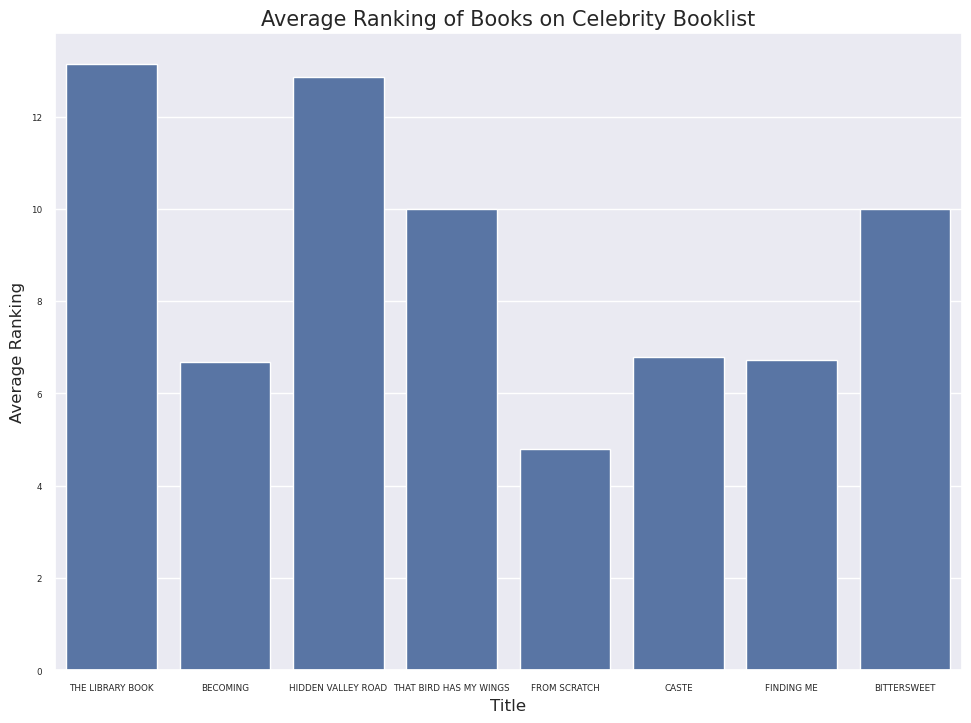

In [59]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Bookinfo.csv')
titles_on_booklist = df.loc[df['On a Celebrity Reading List'] == True]['Title'].unique().tolist()
avg_score = []
for title in titles_on_booklist:
    x = df.loc[df['Title'] == title]['Rank'].tolist()
    avg_score.append(sum(x) / len(x))
d = {'title': titles_on_booklist, 'avg_rank': avg_score}
df2 = pd.DataFrame(data=d)

sns.set_theme(rc={'figure.figsize':(11.7,8.27)}, font_scale=0.575)
sns.barplot(data=df2, x='title', y='avg_rank')
plt.title('Average Ranking of Books on Celebrity Booklist', fontdict={'size': 15})
plt.xlabel('Title', fontdict={'size': 12})
plt.ylabel('Average Ranking', fontdict={'size': 12})

### Number of Weeks on NYT Bestseller List for Books on Celebrity Booklist

The plot below shows how many weeks each book appearing on a celebrity booklist has been on the NYT Bestseller List. 

Text(0, 0.5, '# of Weeks on NYT Bestseller List')

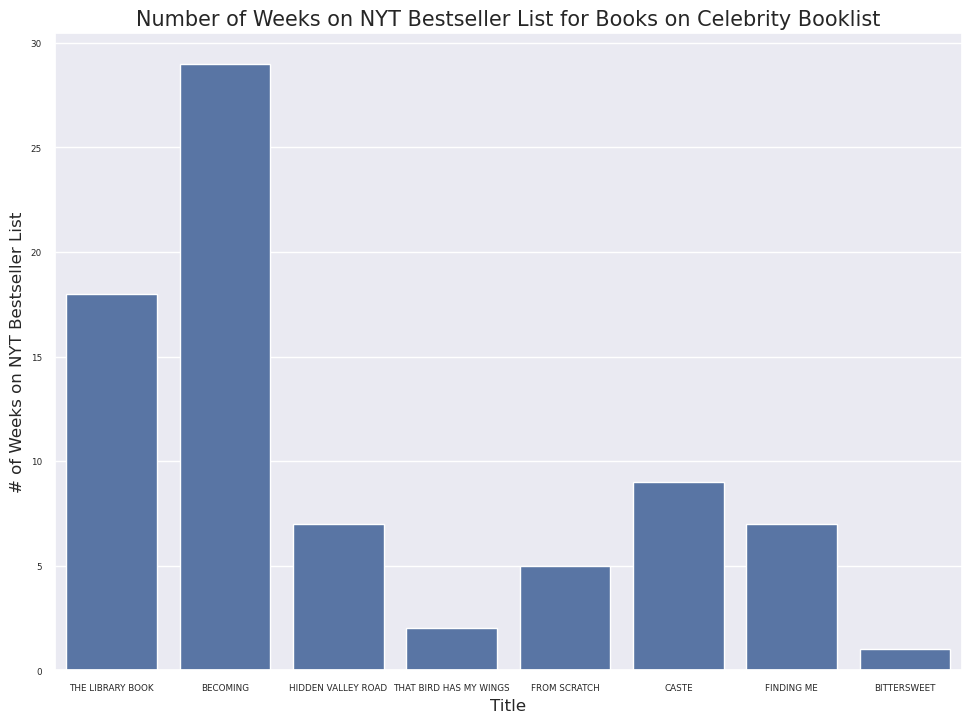

In [62]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Bookinfo.csv')
titles_on_booklist = df.loc[df['On a Celebrity Reading List'] == True]['Title'].unique().tolist()
weeks_on_nyt = []
for title in titles_on_booklist:
    x = df.loc[df['Title'] == title]['Max Weeks on List'].tolist()
    weeks_on_nyt.append(sum(x) / len(x))
d = {'title': titles_on_booklist, 'weeks': weeks_on_nyt}
df2 = pd.DataFrame(data=d)

sns.set_theme(rc={'figure.figsize':(11.7,8.27)}, font_scale=0.575)
sns.barplot(data=df2, x='title', y='weeks')
plt.title('Number of Weeks on NYT Bestseller List for Books on Celebrity Booklist', fontdict={'size': 15})
plt.xlabel('Title', fontdict={'size': 12})
plt.ylabel('# of Weeks on NYT Bestseller List', fontdict={'size': 12})

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |